# Projet Python pour la data science 2024 - 2025
*HADDOUCHE Théo, GOURVENNEC Jules, MATHÉ Cyprien, BROCHET Lison*

# Introduction
<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Depuis les Jeux Olympiques de Paris 2024, un certain nombre de jeunes se sont pris de passion pour le tennis de table et la natation. Cependant, cet engouement s’est heurté au manque d’infrastructure, à leur vétusté et au manque d’encadrant. Cela a de nouveau mis en lumière le problème de l'accessibilité au sport et des « déserts sportifs ». A l’instar des « déserts médicaux », les « déserts sportifs » sont des zones géographiques souvent rurales, où les infrastructures sportives et les encadrants manquent et où infrastructures existantes sont pour la plupart vétustes et mal équipées. Cela constitue un obstacle à la pratique sportive des habitants de ces zones.

Pourtant, il semble exister un consensus sur les bienfaits d’une pratique sportive régulière, en cela qu’elle permet de prévenir un grand nombre de maladies notamment cardiovasculaires ; mais aussi en tant que facteur d’intégration sociale. Aussi, nous avons souhaité questionner cette notion de « désert sportif » sur la base du recensement des équipements sportifs en France. Pour cela, il nous a semblé pertinent d’analyser plusieurs variables telles que la vétusté des infrastructures étudiées, l’offre de sport selon les territoires et l’accessibilité aux infrastructures via des transports en commun.

Notre projet a donc pour objectif de répondre à la problématique suivante : A quel point la situation géographique d’un individu est-elle déterminante dans sa capacité à poursuivre une activité sportive régulière ?
</div>
</div>


# I/ Récupération et traitement des données

## A. Récupération des données : prise en main de l'API

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous utiliserons la base de données Data ES qui recense près de 330 000 infrastructures sportives en France. Ces données sont mises à disposition par le ministère chargé des sports afin "d’aider à une meilleure perception des inégali­tés ter­ri­to­ria­les dans leur répar­ti­tion", perspective dans laquelle s'inscrit notre travail.

Les données que nous allons utiliser sont accessibles par une API qui nous permet de n'accéder qu'à quelques valeurs choisies en évitant de tout télécharger chaque fois. Deux modes d'accès sont permis, l'un limite à 100 éléments livrant directement un dataframe, un autre sans limite donne le lien de téléchargement d'un .csv. Le lien se construit dans l'interface du site avec une syntaxe proche du SQL accessible ici : https://equipements.sports.gouv.fr/explore/dataset/data-es/api/?q.

Les fonctions qui permettent d'obtenir les dataframes par ces deux méthodes sont importées et visibles depuis fonctions.py.
</div>
</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fonctions import *

#Un exemple de lien pour obtenir le nombre d'infrastructures par département à l'aide de la méthode group_by et renommé sous la varibale nb_infra
api_url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=COUNT(inst_numero)%20as%20nb_infra&group_by=dep_nom&order_by=dep_code&limit=-1"
tab = call_api(api_url)
tab.head(3)

dict_keys(['results'])


,dep_nom,nb_infra
0,None,3
1,Ain,4118
2,Aisne,3691


<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour travailler sur des données nettoyées et éviter de refaire le travail de nettoyage à chaque appel, il nous faut garder en mémoire notre traitement. Cependant, pour ne pas avoir un appel trop lourd, nous nous limiterons à n'appeler qu'une partie des 117 caractéristiques d'équipements sportifs disponibles.
</div>
</div>

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous allons donc procéder au traitement sur le jeu réduit de paramètres (31/117 disponibles):

inst_numero, inst_nom, dep_nom, dep_code_filled, new_code, new_name, inst_etat, 
inst_date_creation, inst_date_etat, inst_date_valid, inst_acc_handi_bool, 
inst_trans_bool, equip_numero, equip_nom, equip_type_code, 
equip_type_name, equip_type_famille, equip_x, equip_y, 
equip_etat, equip_eclair, equip_douche, equip_sanit, 
equip_pmr_aire, equip_pmr_douche, equip_pmr_sanit, 
equip_travaux_date, equip_service_date, equip_travaux_type, 
equip_energie, equip_prop_type, dens_lib, zrr_simp
</div>
</div>


In [3]:
#Cette cellule prend environ 1m30 à être exécutée, elle appelle tous les équipements sur les 31 caractéristiques précedemment identifiées.
url = "https://equipements.sports.gouv.fr/api/explore/v2.1/catalog/datasets/data-es/records?select=inst_numero%2C%20inst_nom%2C%20dep_nom%2C%20dep_code_filled%2C%20new_code%2C%20new_name%2C%20inst_etat%2C%20%20inst_date_creation%2C%20inst_date_etat%2C%20inst_date_valid%2C%20inst_acc_handi_bool%2C%20%20inst_trans_bool%2C%20equip_numero%2C%20equip_nom%2C%20equip_type_code%2C%20%20equip_type_name%2C%20equip_type_famille%2C%20equip_x%2C%20equip_y%2C%20%20equip_etat%2C%20equip_eclair%2C%20equip_douche%2C%20equip_sanit%2C%20%20equip_pmr_aire%2C%20equip_pmr_douche%2C%20equip_pmr_sanit%2C%20%20equip_travaux_date%2C%20equip_service_date%2C%20equip_service_periode%2C%20equip_travaux_type%2C%20%20equip_energie%2C%20equip_prop_type%2C%20dens_lib%2C%20zrr_simp&limit=-1"

recensement = call_csv(url)
recensement.head(3)

c:\Users\cypri\Downloads\fonctions.py:32: DtypeWarning: Columns (3,4,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('equipements_ile_de_france.csv', delimiter=';')


,inst_numero,inst_nom,dep_nom,dep_code_filled,new_code,new_name,inst_etat,inst_date_creation,inst_date_etat,inst_date_valid,...,equip_pmr_douche,equip_pmr_sanit,equip_travaux_date,equip_service_date,equip_service_periode,equip_travaux_type,equip_energie,equip_prop_type,dens_lib,zrr_simp
0,I210170003,Boucle de randonnée pedestre,Côte-d'Or,21,21017,Arcenant,Attribué,2009-08-17,2019-05-23,2013-02-14,...,NaN,False,NaN,NaN,NaN,NaN,NaN,Département,Rural à habitat dispersé,NC - Commune non classée
1,I210180001,Massif Spéléologique de la Côte d'Or,Côte-d'Or,21,21018,Arcey,Attribué,2005-12-16,2019-05-23,2015-07-24,...,NaN,False,NaN,NaN,Avant 1945,NaN,NaN,Multi-propriétaire,Rural à habitat très dispersé,NC - Commune non classée
2,I210180002,TERRAIN DE 4 X 4,Côte-d'Or,21,21018,Arcey,Attribué,2009-04-14,2019-05-23,2013-06-03,...,NaN,False,NaN,1986.0,1985-1994,NaN,NaN,Commune,Rural à habitat très dispersé,NC - Commune non classée


### Ajout d'une petit base de données économiques

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour étudier les inégalités entre territoires, il nous semblait intéressant de comparer la base Data ES avec des indicateurs de richesse des territoires. Nous importons en conséquence un fichier .csv mis à disposition par l'INSEE sur https://statistiques-locales.insee.fr/#c=indicator&i=filosofi.rd&s=2021&view=map2 . Ce petit tableau contient le rapport interdécile du niveau de vie, la part des ménages fiscaux imposés et la médiane du niveau de vie par département (données de 2021).
</div>
</div>

In [4]:
#Importation de données économiques depuis : https://statistiques-locales.insee.fr/#c=indicator&i=filosofi.rd&s=2021&view=map2 (INSEE)

data_eco = pd.read_csv('data_eco.csv', delimiter=';', skiprows= 2)
data_eco.head(4)



,Code,Libellé,Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021,Part des ménages fiscaux imposés 2021,Médiane du niveau de vie 2021
0,01,Ain,3.5,55.2,24810
1,02,Aisne,3.1,45.2,20920
2,03,Allier,3,45.3,21500
3,04,Alpes-de-Haute-Provence,3.2,47.3,21790


In [5]:
pip install cartiflette

You should consider upgrading via the 'c:\Users\cypri\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
import geopandas as gpd
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

#Passage en espg 2154 : Lambert 93 pour avoir des surfaces en m²
departements = departements.to_crs(epsg=2154)

# Ajout de l'aire en km²
departements['AREA'] = departements.area.div(1e6)

## B. Nettoyage des données

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Les données disponibles étaient dans l'ensemble plutôt "propres" même si l'on a pu remarquer qu'un grand nombre de caractéristiques n'avaient pas été chaque fois remplies par les usagers, ce qu'il nous faudra prendre en compte au besoin. Il existe tout de même un problème de doublon que nous allons traiter. 
</div>
</div>

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Il existe dans le jeu de données des sites comptés plusieurs fois pour leurs différentes infrastructures (plusieurs bâtiments ou piscines par exemple). Nous souhaitons supprimer ces doublons. Nous pourrions les supprimer par nom de site redondant, mais pour éviter les possibles de conflits de nom sur toute la France, nous préférons ajouter le code de commune à la distinction. Le couple (nom d'infrastructure, code de commune) devrait agir comme clef primaire.
</div>
</div>

Par exemple, pour la piscine d'Orgnac-l'Aven, deux bassins sont recensés alors même qu'ils sont dans la même infrastructure.

In [7]:
colonnes_a_afficher = ['inst_numero', 'inst_nom', 'new_name', 'equip_type_famille', "equip_nom"]
print(recensement[recensement['inst_numero'].isin(['I071680005'])][colonnes_a_afficher])

      inst_numero inst_nom       new_name  equip_type_famille  \
46261  I071680005  PISCINE  Orgnac-l'Aven  Bassin de natation   
46264  I071680005  PISCINE  Orgnac-l'Aven  Bassin de natation   

                  equip_nom  
46261  Bassin rectangulaire  
46264           Bassin rond  


In [8]:
# Création d'une liste qui compte le nombre de doublons par couple (nom d'infrastructure, code de commune) censé représenter une infrastructure unique
doublons = (recensement
            .groupby(['inst_nom', 'new_code'])
            .size()
            .reset_index(name='n')
            .query('n > 0'))

#Suppression des précédents doublons en les remplaçant tous par la première occurence du couple dans le dataset
distinct = recensement.drop_duplicates(subset=['inst_nom', 'new_code'], keep='first')
print("Doublons supprimés : ", len(recensement)-len(distinct))
print("Fréquence de lignes supprimées :", (len(recensement)-len(distinct))/len(recensement))

#Ajout du nombre d'occurence correspondant à chaque couple (nombre de doublons supprimés par infrastructure dans la liste)
df_es = pd.merge(distinct, doublons, on=['inst_nom', 'new_code'], how='outer')

Doublons supprimés :  159518
Fréquence de lignes supprimées : 0.4793713281144351


<div style="text-align: justify;">
Près de 50% des lignes du datasets ont été supprimées, le nettoyage était donc bien nécessaire.

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
On remarque aussi une irrégularité dans le format des codes de département qui nous portera préjudice ensuite. Nous la corrigeons maintenant.
</div>
</div>

In [9]:
#Passage en format standard code INSEE
k = 0
def clean(dep_code):
    global k
    if dep_code == '2A' or dep_code == '2B': #exception pour la Corse NaN
        return dep_code
    if pd.isna(dep_code):  # Gérer les valeurs manquantes
        k+=1
        return None
    return f"{int(float(dep_code)):02d}"

#Application de la fonction précédente
df_es['dep_code_filled'] = df_es['dep_code_filled'].apply(clean)

print('Nombre de sites sans code :', k)

Nombre de sites sans code : 3


Nettoyage de la colonne de période de mise en service : uniformisation du format

In [10]:
# Nettoyer les espaces avant et après les tirets dans la colonne
df_es['equip_service_periode'] = df_es['equip_service_periode'].str.replace('  -  ', ' - ', regex=True)
df_es['equip_service_periode'] = df_es['equip_service_periode'].str.replace(' - ', '-', regex=True)

# Afficher toutes les modalités après nettoyage
print(df_es['equip_service_periode'].unique())

['A partir de 2005' '1985-1994' '1995-2004' nan '1975-1984' '1965-1974'
 '1945-1964' 'Avant 1945']


Il n'y a que 3 sites sans code départemental donc un nettoyage n'est pas nécessaire pour les traiter.

#### Préparation des données de cartiflette et synthèse avec les données éco.
<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
 Nous devons supprimer quelques départements pour cette catégorie de données pour indisponibilité de certaines de leurs valeurs (notamment territoires ultramarins). 
 </div>
 </div>

In [11]:
#Correction des polygones cartiflette pour n'avoir qu'un polygone par département
departements = departements.dissolve(by='INSEE_DEP')
departements = departements.reset_index()

departements['INSEE_DEP'] = departements['INSEE_DEP'].astype(str)

In [12]:
import copy

#Faire une copie pour ne pas enlever les départements dans le dataset initial
departements_eco = copy.deepcopy(departements)

#To merge cartiflette data and the database imported
departements_eco = departements_eco.merge(data_eco, left_on="INSEE_DEP", right_on="Code", how="left")

#Nettoyage de données : retirer les départements dont les données ne sont pas disponibles
departements_eco['Médiane du niveau de vie 2021'] = departements_eco['Médiane du niveau de vie 2021'].replace('N/A - résultat non disponible',np.nan).astype(float)
departements_eco= departements_eco.dropna(subset=['Médiane du niveau de vie 2021'])

#Conversion en format numérique
departements_eco['Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021'] = departements_eco['Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021'].astype(float)
departements_eco.head(2)

,INSEE_DEP,geometry,PAYS,LIBELLE_DEPARTEMENT,POPULATION,SOURCE,AREA,Code,Libellé,Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021,Part des ménages fiscaux imposés 2021,Médiane du niveau de vie 2021
0,01,"POLYGON ((877348.5 6596702.5, 877276.3 6596665...",France,Ain,652432,IGN:EXPRESS-COG-CARTO-TERRITOIRE,5774.271728,01,Ain,3.5,55.2,24810.0
1,02,"POLYGON ((776099.6 6923411.2, 776238.3 6924150...",France,Aisne,531345,IGN:EXPRESS-COG-CARTO-TERRITOIRE,7418.609601,02,Aisne,3.1,45.2,20920.0


## C. Création de nouvelles variables 

Pour une utilisation ultérieure, on compte le nombre d'infrastructures sportives par départment par la nouvelle variable 'count'

In [13]:
#Pour accorder les deux colonnes sur lesquelles merge les bases de donnée, la synthèse se fait sur 'dep_code_filled'
# Le filled est très important pour une question de correspondance de syntaxe

#On compte le nombre de numéro de sites différents par code de département
counts = df_es.groupby('dep_code_filled')['inst_numero'].count().reset_index(name='count')

#On passe le code de département en string pour cartiflette
counts['dep_code_filled'] = counts['dep_code_filled'].astype(str)

#Fusion des données cartiflette et de notre base de données par le numéro des départements maintenant homogénéisé
departements = departements.merge(counts, left_on="INSEE_DEP", right_on="dep_code_filled", how="left")
departements_eco = departements_eco.merge(counts, left_on="INSEE_DEP", right_on="dep_code_filled", how="left")

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour étudier à quel point une zone géographique est bien desservie en termes d’infrastructures sportives, il nous a fallu créer de nouvelles variables, qui se veulent davantage pertinentes et intelligibles pour notre analyse. Cette sous-partie vise à les lister et expliquer la façon dont elles sont définies, afin de pouvoir les évoquer directement par la suite.
</div>
</div>

In [14]:
import io

df_es['equip_service_date'] = pd.to_numeric(df_es['equip_service_date'], errors='coerce') # Conversion de variable en float
df_es['equip_travaux_date'] = pd.to_numeric(df_es['equip_travaux_date'], errors='coerce') # Conversion de variable en float
dff = df_es.copy()
dff['equip_service_date'] = dff['equip_service_date'].fillna(0) # Remplacement des NaN par 0
dff['equip_travaux_date'] = dff['equip_travaux_date'].fillna(0) # Remplacement des NaN par 0

In [15]:
df = dff[dff['equip_service_date'] != 0]
df = df.copy()
df.count()

inst_numero              101729
inst_nom                 101729
dep_nom                  101726
dep_code_filled          101726
new_code                 101726
new_name                 101726
inst_etat                101729
inst_date_creation       101729
inst_date_etat           100145
inst_date_valid           99808
inst_acc_handi_bool      100424
inst_trans_bool           98688
equip_numero             101729
equip_nom                101729
equip_type_code          101706
equip_type_name          101706
equip_type_famille       101706
equip_x                   99794
equip_y                   99797
equip_etat               101729
equip_eclair             100705
equip_douche              99155
equip_sanit              100360
equip_pmr_aire           100083
equip_pmr_douche          20911
equip_pmr_sanit           85141
equip_travaux_date       101729
equip_service_date       101729
equip_service_periode     97012
equip_travaux_type        18618
equip_energie             32064
equip_pr

In [16]:
# Conversion en bool des variables de qualité
df['equip_douche'] = (df['equip_douche'].astype(bool)).astype(int)
df['equip_sanit'] = (df['equip_sanit'].astype(bool)).astype(int)

# Variable représentant la dernière rénovation en date (equip_travaux_date vaut 0 s'il n'y a jamais eu de travaux)
df['derniere_renov'] = np.maximum(df['equip_travaux_date'], df['equip_service_date'])

# Min et max de la dernière rénovation
borne_min = df['derniere_renov'].min()
borne_max = df['derniere_renov'].max()

# Création des var. d'ancienneté
df['coef_recent'] = (df['derniere_renov'] - borne_min)/(borne_max - borne_min) # Coef. représentant l'ancienneté d'une infrastructure en comparaison aux autres de l'échantillon
df['récent'] = (df['derniere_renov']>=2011).astype(int)
df['moyen'] = ((df['derniere_renov']>=1986) & (df['derniere_renov']<2011)).astype(int)
df['ancien'] = ((df['derniere_renov'] >= borne_min) & (df['derniere_renov'] < 1986)).astype(int) 

In [17]:
nombre_lignes = df.shape[0]
print(f"Nombre de lignes : {nombre_lignes}")

Nombre de lignes : 101729


In [18]:
variables_a_afficher = ['inst_numero', 'inst_nom', 'dep_nom', 'new_name', 'inst_date_creation', 'inst_acc_handi_bool', 'inst_trans_bool', 'equip_nom'
, 'equip_type_name', 'equip_douche', 'equip_sanit','equip_travaux_date',  'derniere_renov', 'coef_recent', 'récent', 'moyen', 'ancien']
ligne_99000 = df.iloc[99000][variables_a_afficher]
print(ligne_99000)

inst_numero                    I544820014
inst_nom                centre culturelle
dep_nom                Meurthe-et-Moselle
new_name                        Saint-Max
inst_date_creation             2023-11-22
inst_acc_handi_bool                  True
inst_trans_bool                      True
equip_nom                  salle de danse
equip_type_name            Salle de danse
equip_douche                            1
equip_sanit                             1
equip_travaux_date                    0.0
derniere_renov                     2014.0
coef_recent                      0.972772
récent                                  1
moyen                                   0
ancien                                  0
Name: 168592, dtype: object


In [19]:
df['qualite'] = 0.8 * df['récent'] + 0.4 * df['moyen'] + 0.1 * df['equip_douche'] + 0.1 * df['equip_sanit']

In [20]:
# Calcul moyenne et médiane d'ancienneté
moyenne = df['coef_recent'].mean()
mediane = df['coef_recent'].median()
print(moyenne)
print(mediane)

# Ne conserver que les anciennetés inférieures à un certain seuil
df_filtre = df[df['coef_recent'] < 0.7]

0.9340608308095601
0.943069306930693


<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous avons donc créé les variables suivantes : 
- ’derniere_renov’ correspond au maximum entre la date des derniers travaux et la date de création. Cette variable nous permet de savoir à quel point l’ancienneté d'un bâtiment pèse sur sa qualité (notons que toutes les infrastructures n’ont pas été sujettes à des rénovations).

- ’coef_recent’ est un coefficient compris entre 0 et 1 qui indique à quel point l’infrastructure a été récemment créée ou rénovée, en comparaison aux autres infrastructures de la base de données. Le coefficient vaut notamment 0 pour l’infrastructure la plus ancienne et 1 pour la plus récente.

- ’qualite’ est un coefficient compris entre 0 et 1 qui a pour but de synthétiser la qualité globale d’une infrastructure, aussi bien en termes d’ancienneté que de dispositifs d’hygiène en état d’usage (douches, sanitaires…). Une infrastructure de plus de 50 ans est très pénalisée, là où une infrastructure de moins de 15 ans est valorisée (ces seuils ont été choisis grâce aux différentes sources consultées quant à la vétusté des infrastructures sportives, signalées par une étoile ci-dessous).

- ’geometry’ correspond aux coordonnées de l’infrastructure sous forme de point Shapely, cette nouvelle variable permet de calculer facilement des distances à l’aide de GeoPandas.

*https://www.qualisport.fr/wp-content/uploads/2021/03/01-guide-homologation-v2021.pdf 

*https://www.francetvinfo.fr/sante/sport-et-sante/gymnases-vetustes-et-stades-hors-d-age-le-sport-scolaire-et-amateur-denonce_6229260.html
</div>
</div>


# II/ Analyse descriptive et représentation graphique

## A. Description de la base de données utilisée

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
La base de données nous offre des indicateurs sur les dates de mise en service des installations. Les dates précises sont peu remplies mais la période de mise en service est disponible pour près de 90 % des installations.
</div>
</div>

In [21]:
df_es.columns

Index(['inst_numero', 'inst_nom', 'dep_nom', 'dep_code_filled', 'new_code',
       'new_name', 'inst_etat', 'inst_date_creation', 'inst_date_etat',
       'inst_date_valid', 'inst_acc_handi_bool', 'inst_trans_bool',
       'equip_numero', 'equip_nom', 'equip_type_code', 'equip_type_name',
       'equip_type_famille', 'equip_x', 'equip_y', 'equip_etat',
       'equip_eclair', 'equip_douche', 'equip_sanit', 'equip_pmr_aire',
       'equip_pmr_douche', 'equip_pmr_sanit', 'equip_travaux_date',
       'equip_service_date', 'equip_service_periode', 'equip_travaux_type',
       'equip_energie', 'equip_prop_type', 'dens_lib', 'zrr_simp', 'n'],
      dtype='object')

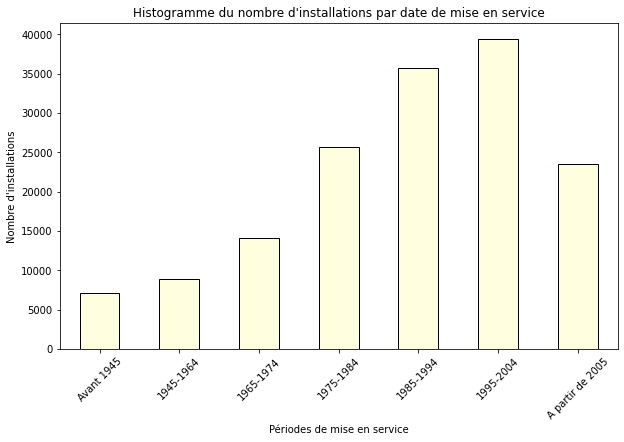

Part de données libellées : 0.8926965546300946


In [22]:
# Compter les occurrences de chaque période de mise en service
period_counts = df_es['equip_service_periode'].value_counts()

# Ordre croissant
sorted_index = ['A partir de 2005'] + [p for p in period_counts.index if p != 'A partir de 2005']
period_counts = period_counts.reindex(sorted_index[::-1])

# Tracer l'histogramme
plt.figure(figsize=(10, 6))
period_counts.plot(kind='bar', color='#FFFFE0', edgecolor='black')
plt.title('Histogramme du nombre d\'installations par date de mise en service')
plt.xlabel('Périodes de mise en service')
plt.ylabel('Nombre d\'installations')
plt.xticks(rotation=45)
plt.show()

print('Part de données libellées :', period_counts.sum() / len(df_es))

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Cet histogramme nous renseigne sur le nombre d'installations mises en service selon la période (périodes de 9 ans depuis 1945) . On remarque alors que la grande majorité des infrastructures ont été mises en service à partir de 1975, et que le nombre d'installations mises en service est croissant entre chaque période de 1945 à 2004 puis décroissant. Ainsi, nous pouvons noter que les infrastructures de la base sont globalement d'ancienneté hétérogène.

### Nombre d'installations par type d'équipement 

C:\Users\cypri\AppData\Local\Temp\ipykernel_17144\1221101497.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='winter')


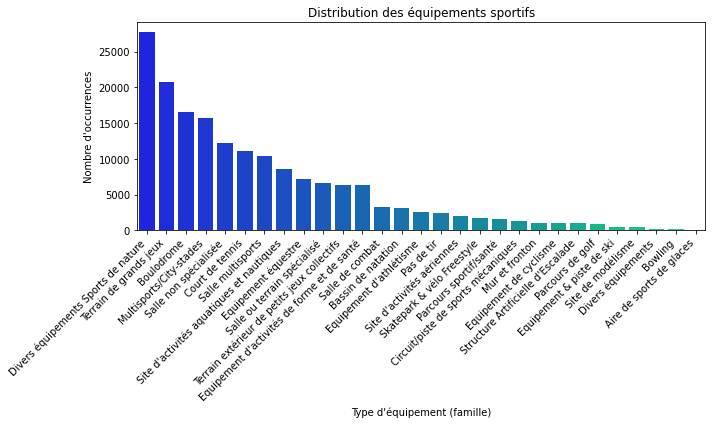

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une table de fréquences
freq_table = pd.DataFrame(df_es['equip_type_famille'].value_counts()).reset_index()
freq_table.columns = ['Var1', 'Freq']

# Visualiser avec un barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Var1', y='Freq', data=freq_table.sort_values('Freq', ascending=False), palette='winter')
plt.title("Distribution des équipements sportifs")
plt.xlabel("Type d'équipement (famille)")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Cet histogramme représente la distribution de notre variables d'intérêt - equip_type_famille -, qui a pour modalité le type d'équipement sportif de l'infrastructure en question, autrement dit à un niveau de détail moins important que la variable equip_nom qui donne le nom usuel de l'infrastructure. Cette variable nous permet donc de visualiser les types d'équipements les plus courants, et ceux qui au contraire sont potentiellement plus difficiles à trouver pour un utilisateur. Cette variable est composée de 29 familles d'équipements, et nous pouvons déjà commenter quelques points par rapport à la construction de la base de données et à la catégorisation des équipements. Certaines familles donnent un niveau de détail qui permet de savoir quel sport est pratiqué à cet endroit : par exemple, la famille "Bowling" donne directement l'activité, tandis que la famille "Divers équipements Sports de nature" rassemble des activités physiques et sportives variées. Quelques points peuvent paraître surprenants. On aurait pu penser que les piscines auraient fait partie des équipements sportifs les plus présents en France, or le bassin de natation apparaît loin derrière le court de tennis par exemple, ou le boulodrome, ce qui, compte tenu de la taille de l'infrastructure et l'accessibilité, est moins étonnant. On remarque à cet égard que plus le libellé de la modalité est vague et plus cette famille rassemble des infrastructures : "Divers équipements Sports de nature", "Terrain de grands jeux", "Salle non spécialisée", "Salle multisports". Il serait donc intéressant d'aller au détail de quelques unes de ces modalités pour voir les sous-modalités associées à ces familles.

In [24]:
df_es_terrain_grands_jeux = df_es[df_es['equip_type_famille'] == 'Terrain de grands jeux'].copy()

# Comptage des occurrences de chaque modalité dans la colonne 'equip_type_name'
tableau_comptage = df_es_terrain_grands_jeux['equip_type_name'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
tableau_comptage.columns = ['Nom du type d\'équipement', 'Fréquence']

# Afficher le tableau
print(tableau_comptage)

        Nom du type d'équipement  Fréquence
0            Terrain de football      18649
1                  Terrain mixte        995
2               Terrain de rugby        989
3  Terrain de baseball /softball         50
4        Terrain de rugby à XIII         21
5    Terrain de hockey sur gazon         19
6             Terrain de cricket          9
7  Terrain de football américain          7


<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Lorsque l'on s'intéresse uniquement à la modalité "Terrain de grands jeux", nous pouvons remarquer que cela renvoie à 8 réalités possibles, pour autant, le football y est l'activité prépondérante, avec plus de 17 fois plus de terrains de football que de terrains de rugby. Cela n'est pas étonnant puisque nous savons que le football est le sport qui regroupe le plus grand nombre de licenciés, devant le tennis et l'équitation.

In [25]:
df_es_sports_nature = df_es[df_es['equip_type_famille'] == 'Divers équipements Sports de nature'].copy()

# Comptage des occurrences de chaque modalité dans la colonne 'equip_type_name'
tableau_comptage = df_es_sports_nature['equip_type_name'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
tableau_comptage.columns = ['Nom du type d\'équipement', 'Fréquence']

# Afficher le tableau
print(tableau_comptage)

                             Nom du type d'équipement  Fréquence
0                                 Boucle de randonnée      18681
1                    Espace de pratique spéléologique       2812
2                          Site d'escalade en falaise       1829
3                                              Canyon       1291
4        Site de spéléologie sportive et/ou éducative       1063
5                                  Refuge de montagne        562
6   Parcours Acrobatique en Hauteur/Site d'accrobr...        434
7               Parcours fixe de course d’orientation        398
8                                    Cascade de glace        214
9                             Via ferrata / Via corda        137
10                           Site de blocs d'escalade        134
11                   Parcours de chasse / en campagne         69
12                               Site de char à voile         42
13                 Equipement pour saut à l’élastique         27
14                 Piste 

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
De la même manière, lorsque l'on s'intéresse à la modalité "Divers équipements Sports de nature", la sous-modalité principale correspond à "Boucle de randonnée" qui compte plus de la moitié des infrastructures de la modalité, et il existe 14 autres sous-modalités pour cette famille. 

In [26]:
df_es_bowling = df_es[df_es['equip_type_famille'] == 'Bowling'].copy()

# Comptage des occurrences de chaque modalité dans la colonne 'equip_type_name'
tableau_comptage = df_es_bowling['equip_type_name'].value_counts().reset_index()

# Renommer les colonnes pour plus de clarté
tableau_comptage.columns = ['Nom du type d\'équipement', 'Fréquence']

# Afficher le tableau
print(tableau_comptage)

  Nom du type d'équipement  Fréquence
0                  Bowling        227


La famille Bowling en revanche n'admet qu'une sous-modalité qui est la même que la modalité principale.

### Indicateur de vétusté violin plot

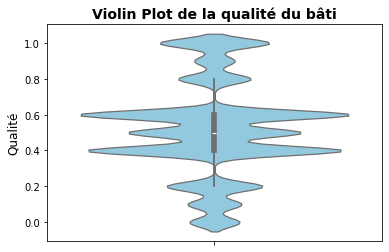

In [27]:
import seaborn as sns

# Exemple : violin plot pour la variable 'qualité'
sns.violinplot(data=df, y='qualite', color='skyblue')  # Ajuster "y" selon l'orientation
plt.title('Violin Plot de la qualité du bâti', fontsize=14, weight='bold')
plt.ylabel('Qualité', fontsize=12)
plt.show()

## B. Grandes tendances observées

### Cartographie

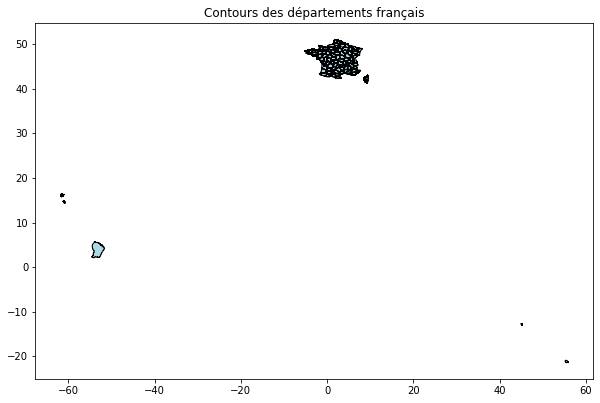

In [28]:
import requests
import geopandas as gpd
from io import BytesIO

# URL de la ressource (fichier GeoJSON)
url2 = "https://www.data.gouv.fr/fr/datasets/r/eb36371a-761d-44a8-93ec-3d728bec17ce"

# Télécharger le fichier GeoJSON
response = requests.get(url2)

# Charger le fichier dans un GeoDataFrame
gdf = gpd.read_file(BytesIO(response.content))

# Tracer la carte des départements
gdf.plot(figsize=(10, 10), edgecolor='black', color='lightblue')
plt.title("Contours des départements français")
plt.show()

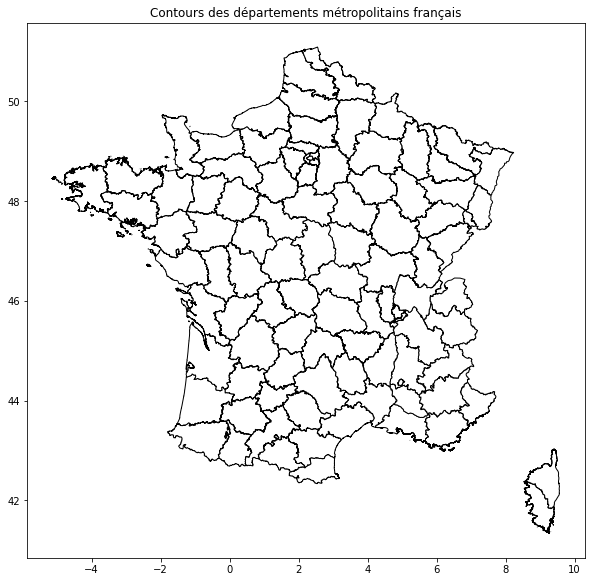

In [29]:
# Création d'un nouvel objet sans les départements d'outre-mer
gdf_metropole = gdf[~gdf['code_insee'].str.startswith('97')]  # Exclure les départements d'outre-mer
gdf_metropole.plot(figsize=(10, 10), edgecolor='black', color='white')
plt.title("Contours des départements métropolitains français")
plt.show()

C:\Users\cypri\AppData\Local\Temp\ipykernel_17144\4022637617.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20", len(equip_types))  # Table de couleurs qualitative


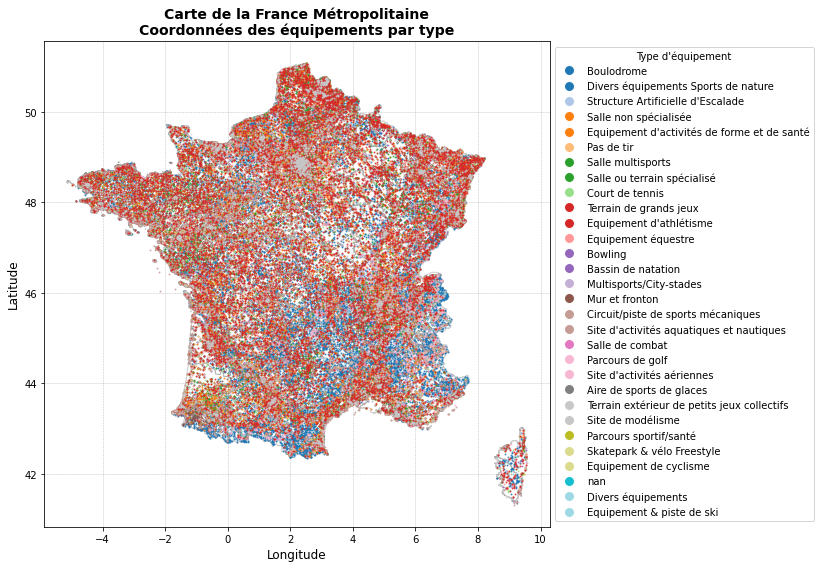

In [30]:


from matplotlib.cm import get_cmap
from matplotlib.lines import Line2D
# Filtrer les points qui ne sont pas en métropole
df_es_metropole = df_es[
    (df_es['equip_x'] >= -5) & 
    (df_es['equip_x'] <= 10) & 
    (df_es['equip_y'] >= 41) & 
    (df_es['equip_y'] <= 52)
].copy()

# Générer une table de couleurs pour les familles d'équipements
equip_types = df_es_metropole['equip_type_famille'].unique()
cmap = get_cmap("tab20", len(equip_types))  # Table de couleurs qualitative
color_dict = {etype: cmap(i) for i, etype in enumerate(equip_types)}

# Attribuer des couleurs à chaque type d'équipement
df_es_metropole['color'] = df_es_metropole['equip_type_famille'].map(color_dict)

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour chaque équipement
for equip_type, group in df_es_metropole.groupby('equip_type_famille'):
    ax.scatter(
        group['equip_x'],
        group['equip_y'],
        color=color_dict[equip_type],
        s=1,  # Taille
        alpha=0.7,
        label=equip_type
    )

# Légende sur mesure avec taille des points plus grosse
legend_handles = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=color_dict[equip_type],
           markersize=10, label=equip_type)  # Taille plus grosse
    for equip_type in df_es_metropole['equip_type_famille'].unique()
]

# Ajouter la légende sur mesure
ax.legend(
    handles=legend_handles,
    title="Type d'équipement",
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=True
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements par type', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous avons tracé une carte qui affiche des points sur le territoire français. Ces points correspondents aux infrastructures recensées, et les couleurs correspondent aux différentes familles d'équipement. A partir de cette carte on peut déjà inférer quelques tendances : 

- le rouge est largement prédominant ce qui signifie qu'une grande majorité de d'infrastructures rentrent dans la catégorie "Terrains de grands jeux". De plus, notons que le rouge est plutôt homogène sur le territoire bien qu'il soit moins présent sur la partie Sud de celui-ci.
- le bleu foncé est également une couleur qui domine sur cette carte. Cela permet de visualiser la quantité importante d'équipements de type "Multisports / City-stades" et "divers équipements sport et nature" présentes sur le territoire notamment sur la partie Sud. 
- nous remarquons également que certaines parties du territoires sont moins dotées en infrastructures (Corse, Landes, Manche, Camargue, diagonale du vide...)


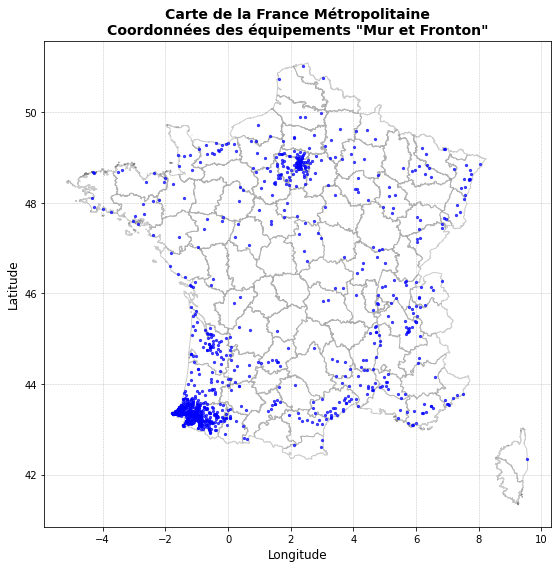

In [31]:
# Restreindre aux modalités "Mur et fronton"
df_es_metropole_fronton = df_es_metropole[df_es_metropole['equip_type_famille'].isin(['Mur et fronton'])]

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour le type "Mur et fronton"
ax.scatter(
    df_es_metropole_fronton['equip_x'],
    df_es_metropole_fronton['equip_y'],
    color= 'blue',
    s=5,  # Taille des points
    alpha=0.7,
    label='Mur et fronton'
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements "Mur et Fronton"', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Quand on ne trace que les points associés à la famille d'équipements "Mur et fronton", la carte confirme notre intuition, que les murs et frontons sont concentrés dans le sud-est, là où la pelote basque y est très développée. De même, il y en a beaucoup à Paris, ce qui n'est pas étonnant car il y a aussi des murs simples de tennis dans cette modalité et ce type d'installation est courant en Ile de France. 

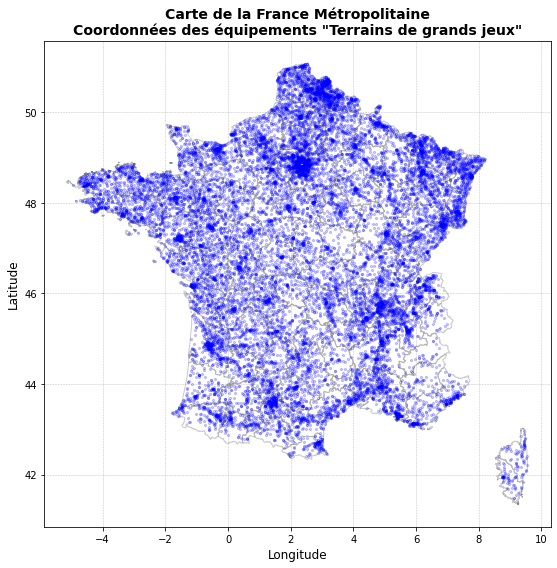

In [32]:
# Restreindre aux modalités "Terrain de grands jeux"
df_es_metropole_foot = df_es_metropole[df_es_metropole['equip_type_famille'].isin(['Terrain de grands jeux'])]

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour le type "Terrain de grands jeux"
ax.scatter(
    df_es_metropole_foot['equip_x'],
    df_es_metropole_foot['equip_y'],
    color= 'blue',
    s=5,  # Taille des points
    alpha=0.2,
    label='Terrain de grands jeux'
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements "Terrains de grands jeux"', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Pour les terrains de grands jeux, qui regroupent en particulier les terrains de football, on voit des concentrations au niveau des grandes villes françaises, ainsi que dans le Nord et l'Est.

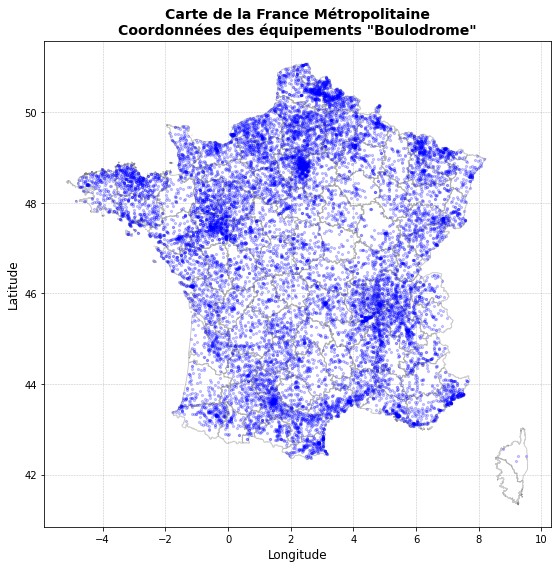

In [33]:
# Restreindre aux modalités "Boulodrome"
df_es_metropole_boulodrome = df_es_metropole[df_es_metropole['equip_type_famille'].isin(['Boulodrome'])]

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour le type "Boulodrome"
ax.scatter(
    df_es_metropole_boulodrome['equip_x'],
    df_es_metropole_boulodrome['equip_y'],
    color= 'blue',
    s=5,  # Taille des points
    alpha=0.2,
    label='Boulodrome'
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements "Boulodrome"', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
En ce qui concerne les boulodromes, on voit aussi des disparités régionales, qui correspondent aux différents jeux de boule. Dans le Sud-Est et dans le Nord, on joue à la pétanque, mais des jeux tels que la boule lyonnaise sont pratiqués dans le Dauphiné ou la boule nantaise dans la région du Val-de-Loire. La faible quantité de boulodromes dans le Sud-Est peut-être due à la non comptabilisation des terrains de pétanque privés.

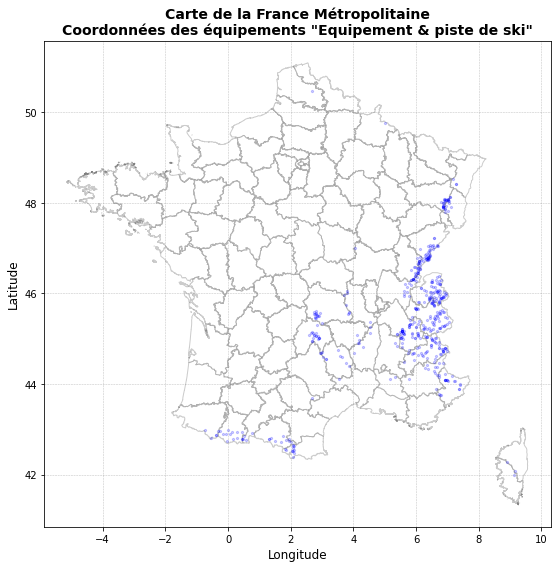

In [34]:
# Restreindre aux modalités "Equipement & piste de ski"
df_es_metropole_ski = df_es_metropole[df_es_metropole['equip_type_famille'].isin(['Equipement & piste de ski'])]

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour le type "Equipement & piste de ski"
ax.scatter(
    df_es_metropole_ski['equip_x'],
    df_es_metropole_ski['equip_y'],
    color= 'blue',
    s=5,  # Taille des points
    alpha=0.2,
    label='Equipement & piste de ski'
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements "Equipement & piste de ski"', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Comme attendu, nous remarquons que les équipements de ski sont concentrées dans les régions montagneuses : Jura, Alpes, Pyrénées, Vosges et Massif-Central. --> Je voudrais insister dans cette partie qu'il y a des infrastructures qui sont liés à des traditions régionales (pelote basque), mais aussi à des spécificités territoriales (ski), d'où un contrôle qu'il faut faire dans les régressions, et que c'est pas aussi facile que ça de traiter le problème.

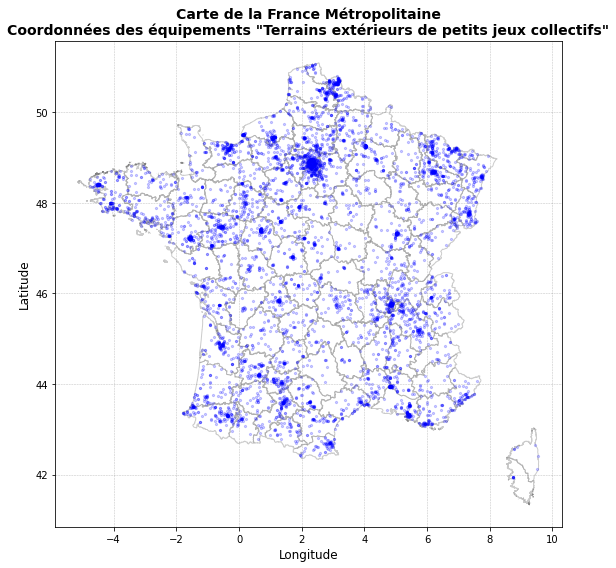

In [35]:
# Restreindre aux modalités "Terrain extérieur de petits jeux collectifs"
df_es_metropole_petits_jeux = df_es_metropole[df_es_metropole['equip_type_famille'].isin(['Terrain extérieur de petits jeux collectifs'])]

# Tracer la carte
fig, ax = plt.subplots(figsize=(12, 8))

# Fond de carte de la France métropolitaine
gdf_metropole.plot(ax=ax, color='white', edgecolor='gray', alpha=0.4)

# Tracer les points pour le type "Terrain extérieur de petits jeux collectifs"
ax.scatter(
    df_es_metropole_petits_jeux['equip_x'],
    df_es_metropole_petits_jeux['equip_y'],
    color= 'blue',
    s=5,  # Taille des points
    alpha=0.2,
    label='Terrain extérieur de petits jeux collectifs'
)

# Ajouter les informations sur la carte
plt.title('Carte de la France Métropolitaine\nCoordonnées des équipements "Terrains extérieurs de petits jeux collectifs"', fontsize=14, weight='bold')
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()

# Montrer la carte
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Nous pouvons remarquer que les "Terrains extérieurs de petits jeux collectifs" sont principalement présents dans les grandes métropoles et notamment en Ile de France. Cela peut s'expliquer par le fait que la modalité "Terrains extérieurs de petits jeux collectifs" concentre principalement des terrains de baskets et d'autres petites infrastructures idéales pour les zones urbaines dans lesquelles il y a peu de place. 

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Cette étude de carte, selon différentes modalités nous permet d'établir différents critères déterminants du type d'infrastructures présentes au sein d'une zone géographique : 

- Spécificités naturelles de la zone : en effet, les éléments naturels spécifiques à une zone géographique peuvent permettre ou non certaines pratiques sportives. Par exemple, nous avons observer que les pistes de ski sont présentes en grande majorité dans les zones montagneuses. 
- Spécificités géographique de la zone : en effet, dans les zones très urbaines, où se trouve une forte densité de population et de construction, il n'est pas possible de construire de grandes infrastructures. Par exemple, en ville on trouve beaucoup de "terrains extérieurs de petits jeux collectifs".
- Pratiques régionales de la zone : en effet, les pratiques sportives spécifiques à certaines zones induisent un plus grand nombre d'infrastructure d'un certain type. Par exemple, la boule lyonnaise, la pétanque etc. 

### Tris croisés

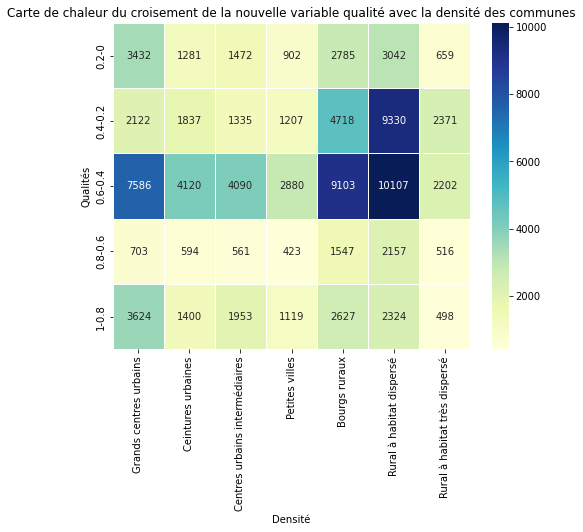

In [36]:
df_copy = df.copy()
# Discrétisation de la variable en 5 catégories
df_copy["qualite_cat"] = pd.cut(df_copy["qualite"], bins=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=["0.2-0", "0.4-0.2", "0.6-0.4", "0.8-0.6", "1-0.8"])
# Réarrangement des modalités de la variable
df_copy["dens_lib"] = pd.Categorical(df_copy["dens_lib"], categories=["Grands centres urbains", "Ceintures urbaines", "Centres urbains intermédiaires", "Petites villes", "Bourgs ruraux", "Rural à habitat dispersé", "Rural à habitat très dispersé", "nan"], ordered=True)

# Tri croisé des deux variables
table_croisee = pd.crosstab(df_copy["qualite_cat"], df_copy["dens_lib"])

# Créer une heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(table_croisee, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title("Carte de chaleur du croisement de la nouvelle variable qualité avec la densité des communes")
plt.xlabel("Densité")
plt.ylabel("Qualités")
plt.show()

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
Cette carte de chaleur croise la variable que nous avons créée sur la qualité des infrastructures, qui prend en compte l'ancienneté de l'équipement, la date des derniers travaux ainsi que la présence de sanitaires et de douches, avec la densité des communes, telle que définie par l'INSEE (https://www.insee.fr/fr/statistiques/6686472). On voit que quand les infrastructures sont de bonne qualité, selon notre indicateur, elles sont plus souvent dans des grands centres urbains, et peu dans des communes rurales à habitat très dispersé. A l'inverse, quand elles sont de mauvaise qualité, selon notre indicateur, elles sont également plus souvent dans des grands centres urbains, et peu dans des communes rurales à habitat très dispersé. Pour tous les niveaux de densité de commune, la plus grosse partie des équipements se situe à des niveaux de qualité moyenne autour de 0.6-0.4 Ainsi, il semble difficile de faire l'hypothèse que les équipements de meilleure qualité se situent en ville, mais on voit quand même que les communes des bourgs ruraux et zones moins denses concentrent moins d'infrastructures dont la qualité est supérieure à 0.6, ce qui pourrait avoir un impact sur l'expérience des usagers habitant ces communes par rapport à ceux des villes.

### Visualisation des données économiques

Pour conclure cette partie, nous proposons de montrer aussi en cartes les données économiques et variables que nous allons utiliser dans la partie suivante. 

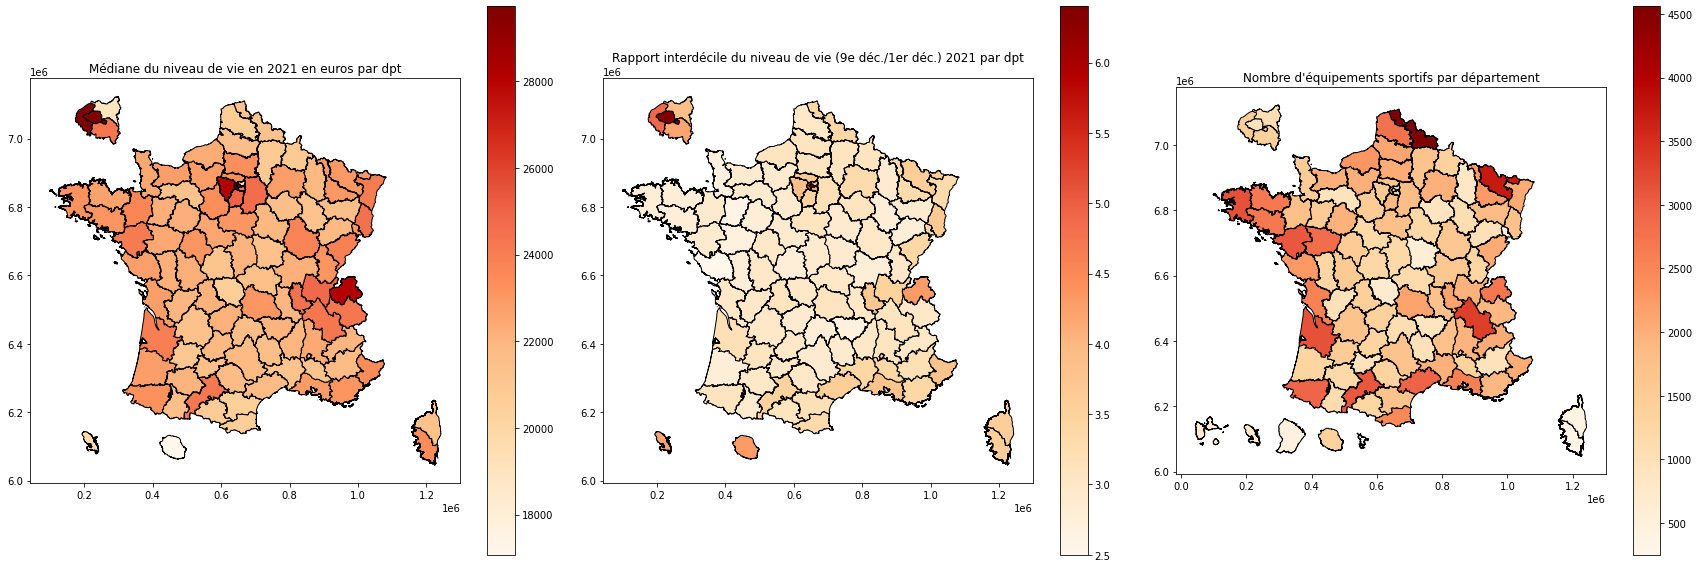

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

departements_eco.plot(
    column='Médiane du niveau de vie 2021',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[0],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[0].set_title('Médiane du niveau de vie en 2021 en euros par dpt')

#Rapport interdécile du niveau de vie (sorte de niveau d'inégalité)

departements_eco.plot(
    column='Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[1],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[1].set_title("Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021 par dpt")

# Tracer une première carte de nb d'infra par dep
departements.plot(
    column='count',            # La colonne utilisée pour colorier la carte
    cmap='OrRd',                  # Palette de couleurs (Orange-Red)
    legend=True,                  # Afficher une légende
    ax=axes[2],              # Taille de la carte
    edgecolor='black'             # Couleur des bordures
)

axes[2].set_title('Nombre d\'équipements sportifs par département')

plt.tight_layout()

On peut noter que le nombres d'équipements sportifs est très élevé en IDF comparément à sa taille, en faisant un espace exceptionnellement dense en infrastructures.

# III/ Modélisation

<div style="text-align: justify;">
<div style="text-align: justify; line-height: 1.8;">
On propose, pour identifier quelques liens possibles derrière ces inégalités, de faire une régression linéaire multivariée à partir des paramètres que nous avons précédemment utilisé.

La fonction regression est accessible dans fonctions.py

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Copie du dataset par précaution
df_reg = copy.deepcopy(departements_eco)

# Sélectionner les colonnes pour la régression
X = df_reg[['POPULATION', 'Médiane du niveau de vie 2021','Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021','AREA']]  # Variables indépendantes
y = df_reg['count']            # Variable dépendante

results = regression(X,y)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     38.12
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           7.47e-19
Time:                        20:52:13   Log-Likelihood:                -740.85
No. Observations:                  98   AIC:                             1492.
Df Residuals:                      93   BIC:                             1505.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
================================================================================================================================
                                                                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                          848.2481   1122.961      0.755      0.450   -1352.715    3049.211
POPULATION                                                       0.0012      0.000      8.835      0.000       0.001       0.001
Médiane du niveau de vie 2021                                    0.0149      0.035      0.420      0.675      -0.055       0.084
Rapport interdécile du niveau de vie (9e déc./1er déc.) 2021  -332.4190    175.945     -1.889      0.059    -677.265      12.427
AREA                                                             0.1443      0.032      4.523      0.000       0.082       0.207
==============================================================================
Omnibus:                        9.490   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.408
Skew:                           0.662   Prob(JB):                      0.00906
Kurtosis:                       3.744   Cond. No.                     1.39e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Avec un R² de 0,6, les variables explicatives ne contiennent pas toute l'information. Le coefficient de la médiane, comme de la population et de la densité sont du signe attendu respectivement. On s'attendait notamment à ce que les territoires plus aisés soient injustement favorisés. Le coefficient du rapport interdécile est aussi du signe attendu soulignant les inégalités.

Ils sont tous significatifs étant donné les ordres de grandeur des variables en jeu. La médiane du niveau de vie par exemple variant de l'ordre de 1000 euros entre département compterait tout étant égal par ailleurs pour une dizaine d'infrastructures. On relève tout de même de grandes incertitudes sur les coefficients associés au niveau de vie, le test de valeur nulle étant proche de 70% pour la médiane du niveau de vie. 

Ces dernières constatation ne confirment pas de fortes attentes d'ingalités entre les territoires.

## A. Vue globale des inégalités à l'aide d'un indice de Gini

Dans cette dernière partie, nous formulons une première méthode pour prévoir les besoins en équipements sportifs à prévoir pour compenser les inégalités entre territoires.

Nous considérons par exemple que des territoires dotés également en infrastructures auraient un nombre d'infrastructure prévu seulement en fonction du nombre d'habitants et de la superficie (contrainte spatiale) d'un département par exemple.

Pour "mesurer" le niveau d'inégalité, entre départements par exemple, on peut calculer le coefficient de Gini pour la richesse en installations (nombre) contrôlée par des caractéristiques du département comme sa population.
Un calcul par région ne serait pas pertinent au vu du faible échantillon dans chacun d'entre eux, mais un coefficient national avec près de 100 départements l'est déjà beaucoup plus.

In [39]:
def gini(df, X_col, Y_col):

    populations = df[X_col].values
    installations = df[Y_col].values 
    
    # Trier les départements par leur ratio nb_install / X (contrôle)
    sorted_indices = np.argsort(installations / populations)
    sorted_populations = populations[sorted_indices]
    sorted_installations = installations[sorted_indices]
    
    # Compute cumulative sums
    cumulative_populations = np.cumsum(sorted_populations)
    cumulative_installations = np.cumsum(sorted_installations)
    total_population = np.sum(populations)
    total_installations = np.sum(installations)
    
    normalized_populations = cumulative_populations / total_population
    normalized_installations = cumulative_installations / total_installations
    
    # Calcul du coefficient par méthode graphique
    lorenz_x = np.insert(normalized_populations, 0, 0)
    lorenz_y = np.insert(normalized_installations, 0, 0)
    area_under_curve = np.trapezoid(lorenz_y, lorenz_x)
    gini = 1 - 2 * area_under_curve
    
    return gini

print('Indice de Gini du nombre d\'infrastructures par département par population :',gini(df_reg,'POPULATION','count'))
print('Indice de Gini du nombre d\'infrastructures par département par niveau de vie:',gini(df_reg,'Médiane du niveau de vie 2021','count'))

Indice de Gini du nombre d'infrastructures par département par population : 0.2975721452446398
Indice de Gini du nombre d'infrastructures par département par niveau de vie: 0.22788648038977655


Il est difficile d'interpréter ces coefficients sans comparaison intertemporelle. On observe tout de même que les coefficients observés témoignent d'une inégalité mesurée avec moins des coefficients sous la barre de 1/3. Le coefficient de Gini contrôlé par un indicateur de revenu est plus faible que celui calculé à partir des parts de population ce qui fait transparaitre une concentration plus importante des infrastructures dans les mains des plus aisés.

## B.Estimation des efforts à fournir pour égaliser les territoires

N'ayant pas accès aux montants des investissements déployés, nous proposons de nous intéresser à la place au nombre d'installations des territoires. Il devrait dépendre principalement de la population dans une situation égalitaire, mais pour prendre en compte la difficulté à les construire (et donc leur coût potentiel) par manque d'espace par exemple, nous prendrons aussi en compte la superficie disponible des départements.

Cette démarche est largement imparfaite, ne prenant pas en compte les dimensions de chaque installation ou leur type, mais elle se veut présenter des premiers ordres de grandeur d'effort.

In [40]:
df_reg['densite'] = df_reg['POPULATION']/df_reg['AREA']
X = df_reg[['POPULATION','densite']]  # Variables indépendantes
y = df_reg['count']            # Variable dépendante
dep_idx = df_reg['LIBELLE_DEPARTEMENT']

tempdf = prediction(X,y, afficher = False)

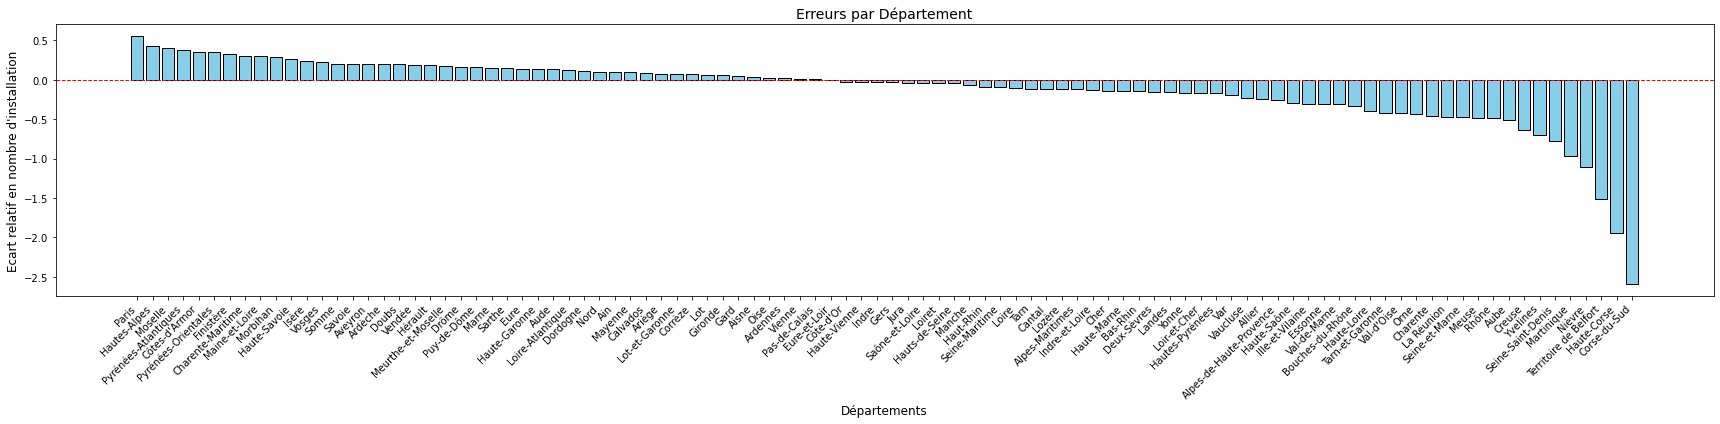

In [41]:
# Trier les départements par ordre d'erreur (optionnel)
tempdf['dep_nom'] = dep_idx
tempdf['wealth'] = df_reg['Médiane du niveau de vie 2021']
tempdf['ratio'] = tempdf['error']/df_reg['count']
tempdf = tempdf.sort_values(by='ratio', ascending=False)

# Créer le bar plot
plt.figure(figsize=(24, 6))  # Ajuster la taille de la figure
plt.bar(tempdf['dep_nom'], tempdf['ratio'], color='skyblue', edgecolor='black')

# Ajouter des titres et des labels
plt.title('Erreurs par Département', fontsize=14)
plt.xlabel('Départements', fontsize=12)
plt.ylabel('Ecart relatif en nombre d\'installation', fontsize=12)
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Ligne horizontale pour zéro

# Ajuster la rotation et l'alignement des noms de départements
plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()  # Ajuste la disposition pour éviter les chevauchements
plt.show()

Ce dernier graphique veut pouvoir comparer ce qui sépare chaque département de la situation nationale. Y est représenté la différence entre le nombre d'installations effectifs, et celui prédit par la régression sur les variables (population, densité), divisé par le nombre d'installations de chaque commune.

On y observe que les départments les plus en retard le serait de près 50 % de leur nombre total d'installation (atteignant même plus de 100 % pour les départements le splus désavantagés). Paris figure "avantagé" par rapport à la moyenne nationale, une conséquence de considérer l'investissement nécessaire dans une région à forte pression foncière.  

En réarrangeant ces départements par niveau de vie économique (possible en changeant le ascending order par 'wealth' dans la cellule ci-dessus), on ne voit pas de tendance claire associée à la distribution des inégalités, ce qui invite à une analyse plus fine pour établir le lien.

## Conclusion

Ce travail avait pour objectif de rendre compte de l'état des déserts sportifs en France en utilisant une base de donnée alimentée par les pouvoirs publics sur la situation des infrastructures sportives. 

Nous avons opéré différents traitements à l'aide d'outil d'analyse de données pour représenter et visualiser la situation, en identifier les paramètres clefs et effectuer des calculs plus poussés pour étudier la répartition des équipements sportifs français sur le territoire.

Notre travail rend bien compte d'inégalités et de la présence de désert sportifs sur plusieurs niveaux. Certains territoires comme les aires urbaines sont souvent mieux dotés aussi avec des installations plus récentes que les territoires ruraux, certains types d'installation sont très fortement liés à des territoires spécifiques ce qui en limite l'accès à ceux qui en sont éloignés. Les caractéristiques précises de ces déserts sportifs restent cependant difficile à identifier complètement, le désert sportif restant une réalité locale non complètement réductible à des enjeux d'urbanisation ou d'inégalités économiques.



-Ce qu’on y a fait grosso modo : outil de calcul de distance + résultats des régressions
-Les extensions possibles (ex pour ma partie : calculer et comparer les distances minimales moyennes dans différents départements et avoir une idée d’à quel point les départements enclavés sont pénalisés)